In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Loading in Data
spotify = pd.read_csv('Spotify Dataset.csv', index_col=0)

In [3]:
spotify

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


# Exploratory Data Analysis

In [4]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           11

In [5]:
missing_counts = spotify.isna().sum()

print(missing_counts)

track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


In [6]:
## Dropping Missing Values
spotify = spotify.dropna()


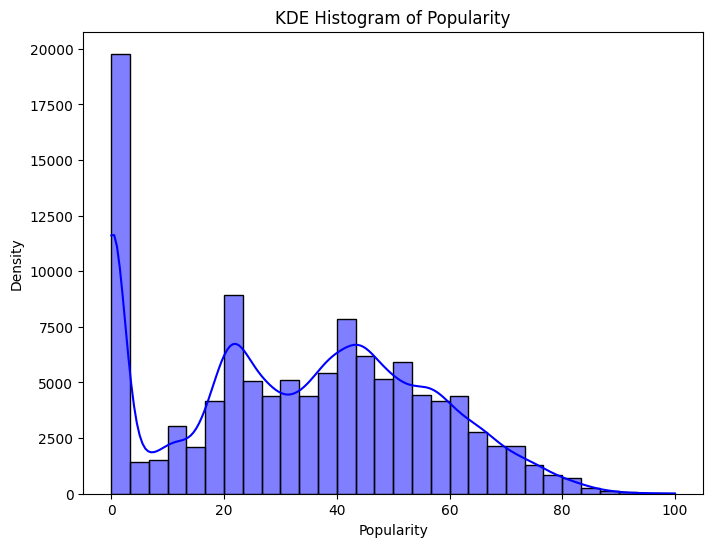

In [7]:
## Plotting a KDE histogram for popularity
plt.figure(figsize=(8, 6))
sns.histplot(spotify['popularity'], kde=True, bins=30, color='blue', edgecolor='black')
plt.title('KDE Histogram of Popularity')
plt.xlabel('Popularity')
plt.ylabel('Density')

plt.show()


In [8]:
spotify.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,113999.000000,1.139990e+05,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000
mean,33.238827,2.280312e+05,0.566801,0.641383,5.309126,-8.258950,0.637558,0.084652,0.314907,0.156051,0.213554,0.474066,122.147695,3.904034
std,22.304959,1.072961e+05,0.173543,0.251530,3.559999,5.029357,0.480708,0.105733,0.332522,0.309556,0.190378,0.259261,29.978290,0.432623
min,0.000000,8.586000e+03,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218500,4.000000
50%,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.597500,0.049000,0.273000,0.683000,140.071000,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


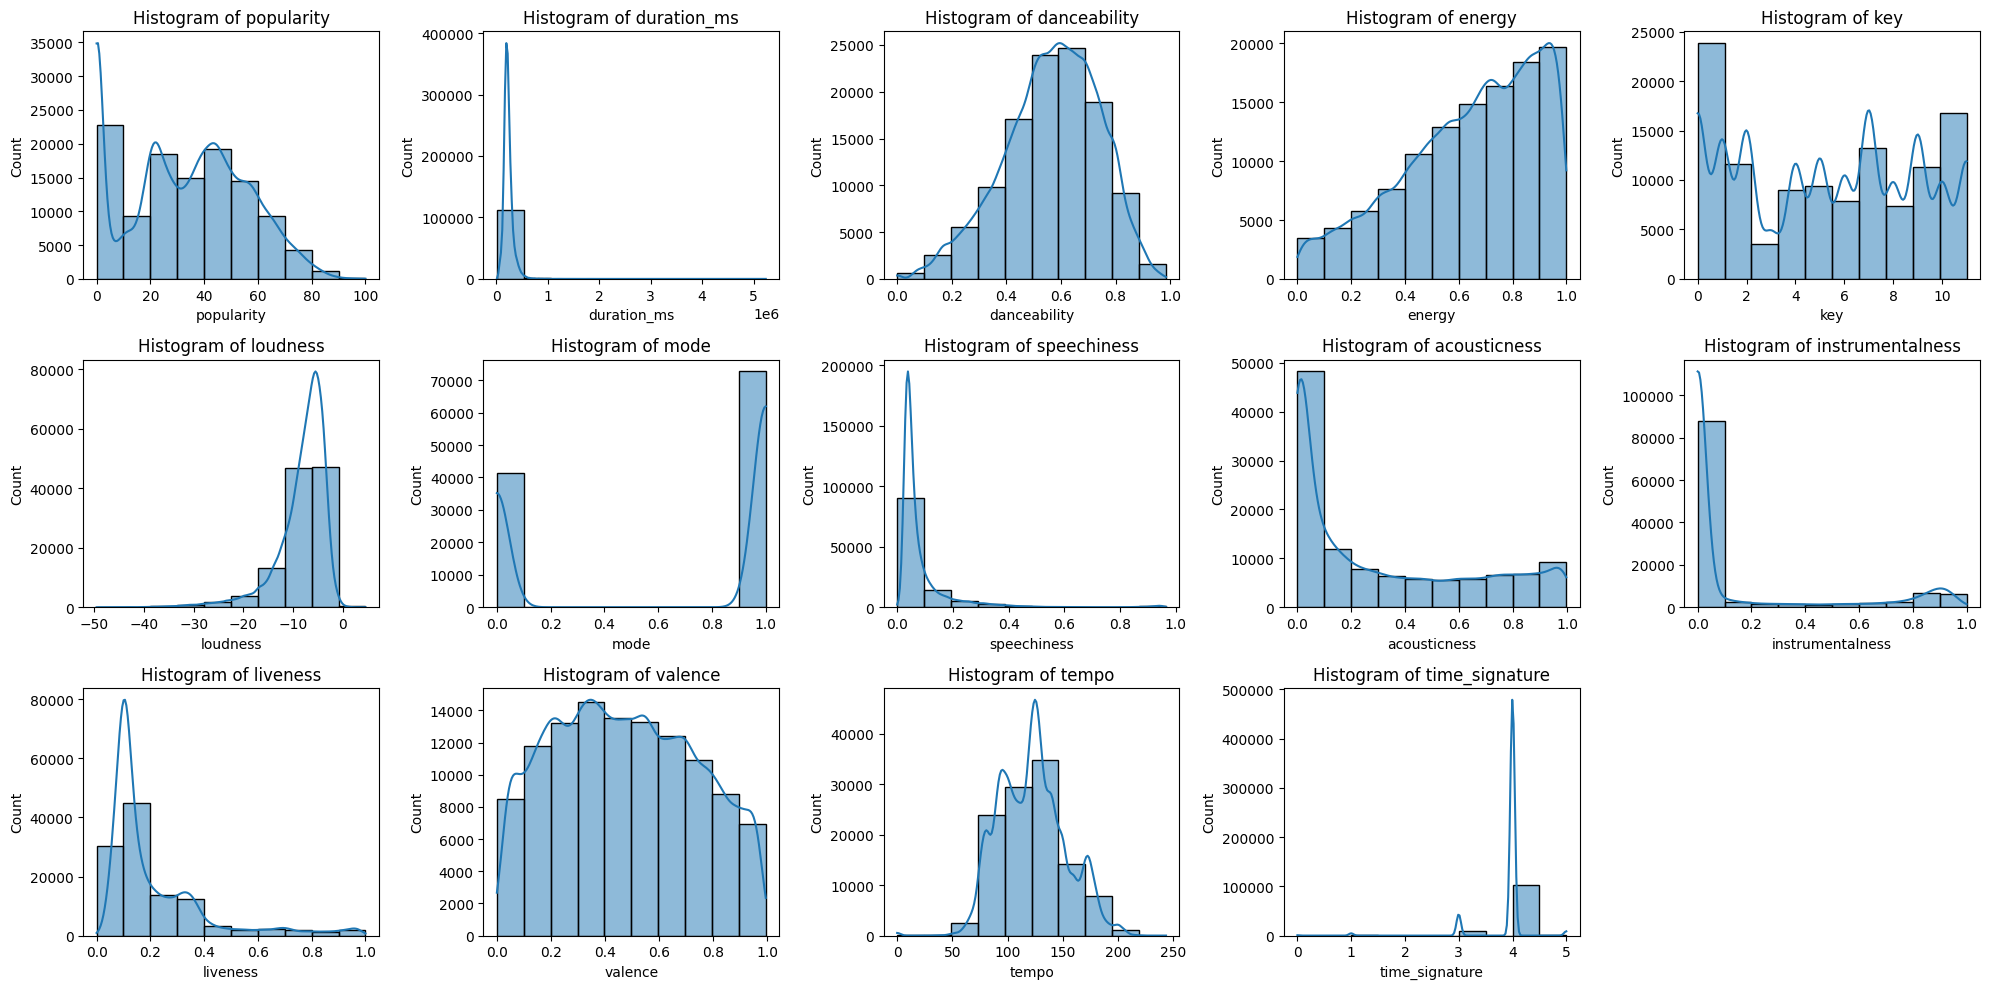

In [9]:
## Defining the number of rows and columns for subplots
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(20, 10))
axes = axes.flatten()

num_col = spotify.select_dtypes(np.number).columns

## Looping through numeric columns and plotting
for i, col in enumerate(num_col):
    sns.histplot(spotify[col], bins=10, kde=True, edgecolor='black', ax=axes[i])
    axes[i].set_title(f'Histogram of {col}')
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

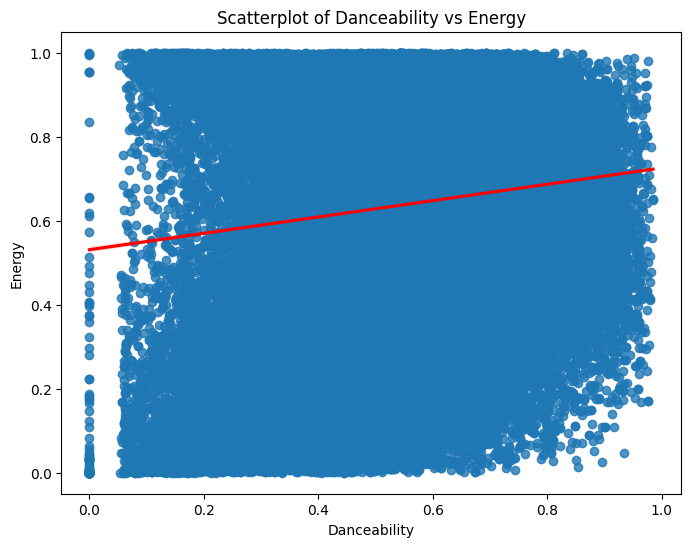

In [10]:
## Danceability vs. energy
plt.figure(figsize=(8, 6))
sns.regplot(x='danceability', y='energy', data = spotify, line_kws={'color':'r'})
plt.title('Scatterplot of Danceability vs Energy')
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.show()

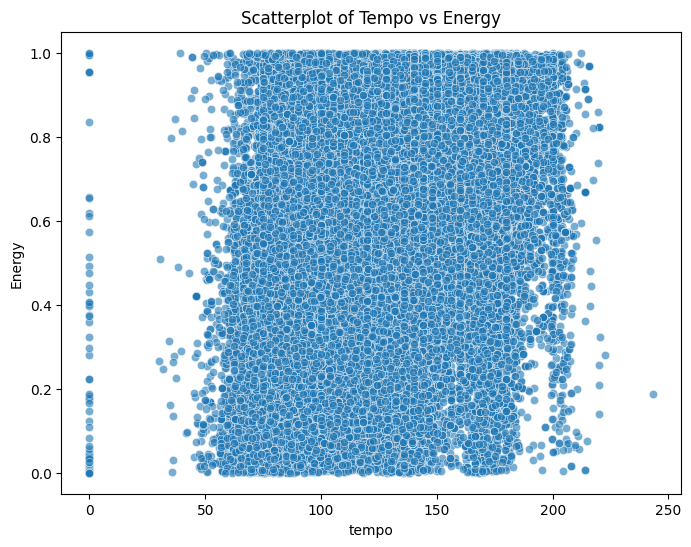

In [11]:
## tempo vs. energy
plt.figure(figsize=(8, 6))
sns.scatterplot(x=spotify['tempo'], y=spotify['energy'], alpha=0.6)
plt.title('Scatterplot of Tempo vs Energy')
plt.xlabel('tempo')
plt.ylabel('Energy')
plt.show()

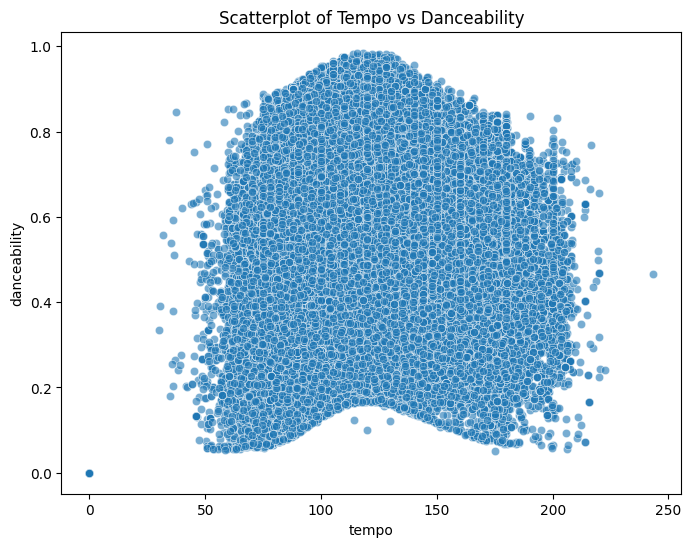

In [12]:
## tempo vs. danceability
plt.figure(figsize=(8, 6))
sns.scatterplot(x=spotify['tempo'], y=spotify['danceability'], alpha=0.6)
plt.title('Scatterplot of Tempo vs Danceability')
plt.xlabel('tempo')
plt.ylabel('danceability')
plt.show();

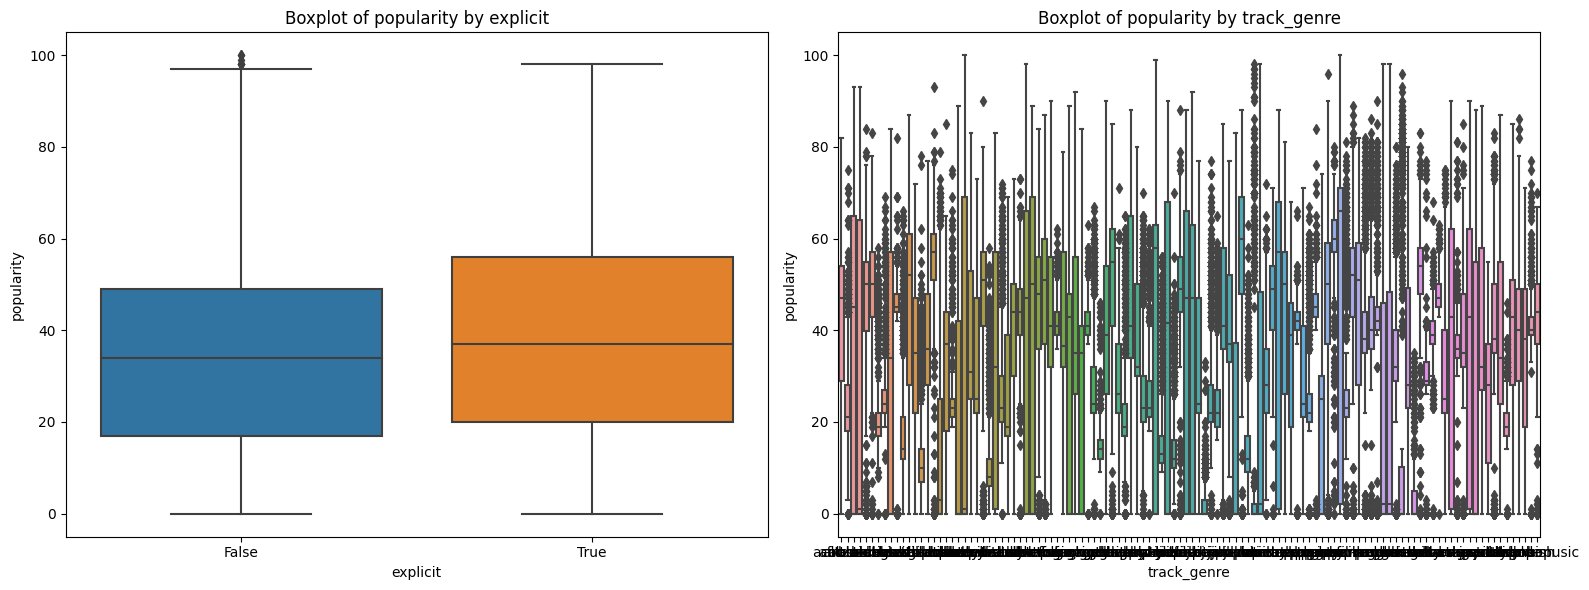

In [13]:
## Boxplots for categorical variables
cat_col = ['explicit', 'track_genre']
target = 'popularity'

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

## Looping through categorical columns and create boxplots
for i, col in enumerate(cat_col):
    sns.boxplot(x=spotify[col], y=spotify[target], ax=axes[i])
    axes[i].set_title(f'Boxplot of {target} by {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel(target)

plt.tight_layout()
plt.show();

<Axes: xlabel='explicit', ylabel='count'>

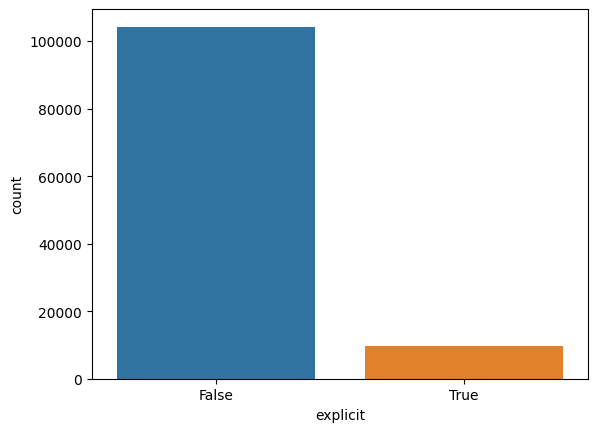

In [14]:
## Countplopt of explicit
sns.countplot(x=spotify['explicit'])

In [15]:
## Seeing top genres and their counts
top_genres = spotify['track_genre'].value_counts().reset_index()
top_genres.columns = ['track_genre', 'count']
top_genres = top_genres.sort_values(by='count', ascending=False)

top_genres



,track_genre,count
0,acoustic,1000
85,dubstep,1000
83,alt-rock,1000
82,alternative,1000
81,ambient,1000
...,...,...
34,techno,1000
33,trance,1000
32,trip-hop,1000
31,turkish,1000


In [16]:
## Seeing the total number of track genres
spotify['track_genre'].unique()

array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
       'breakbeat', 'british', 'cantopop', 'chicago-house', 'children',
       'chill', 'classical', 'club', 'comedy', 'country', 'dance',
       'dancehall', 'death-metal', 'deep-house', 'detroit-techno',
       'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm',
       'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk',
       'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove',
       'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle',
       'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian',
       'indie-pop', 'indie', 'industrial', 'iranian', 'j-dance', 'j-idol',
       'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino',
       'malay', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb',
       'new-age', 'opera', 'pagode', 'party', 'piano', 'pop-film', 'pop',
       'pow

In [17]:
## Seeing what artists pop up the most times
spotify.groupby('artists').size().sort_values(ascending=False).head(20)


artists
The Beatles              279
George Jones             271
Stevie Wonder            236
Linkin Park              224
Ella Fitzgerald          222
Prateek Kuhad            217
Feid                     202
Chuck Berry              190
Håkan Hellström          183
OneRepublic              181
The Beach Boys           176
my little airport        171
Elvis Presley            169
Charlie Brown Jr.        169
Red Hot Chili Peppers    159
Bryan Adams              157
Scooter                  155
Daddy Yankee             154
Arctic Monkeys           152
BTS                      151
dtype: int64

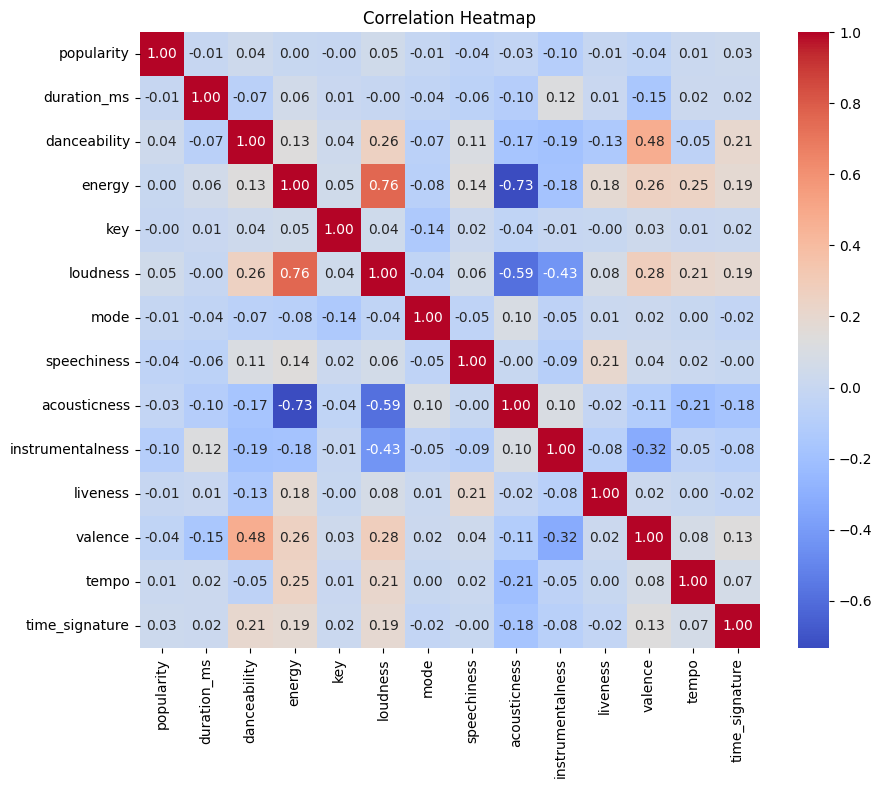

In [18]:
## Correlation matrix heatmap
correlation_matrix = spotify[num_col].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


## Feature Engineering

In [19]:
# drop useless columns 
spotify = spotify.drop(['track_id', 'artists', 'album_name', 'track_name'], axis=1)
spotify

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


### list of Features

- duration_ms: min-max scaler, continuous (0-1)
- danceability: continuous (0-1)
- energy: continuous (0-1)
- key: categorical (dummy encoder)
- loudness: min-max scaler, continuous (0-1)
- mode: categorical, binary (dummy encoder)
- speechiness: continuous (0-1)
- acousticness: continuous (0-1)
- instrumentalness: continuous (0-1)
- liveness: continuous (0-1)
- valence: continuous (0-1)
- tempo: min-max scaler, continuous (0-1)
- time_signature: categorical (dummy encoder)
- track_genre: categorical (dummy encoder)

Target variable
- popularity: min-max scaler

In [20]:
# scaling features 

from sklearn.preprocessing import MinMaxScaler
feature_scaler = MinMaxScaler().set_output(transform='pandas')
target_scaler = MinMaxScaler().set_output(transform='pandas')

spotify[['duration_ms', 'loudness', 'tempo']] = feature_scaler.fit_transform(spotify[['duration_ms', 'loudness', 'tempo']])
spotify['popularity'] = target_scaler.fit_transform(spotify[['popularity']])

spotify

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0.73,0.042473,False,0.676,0.4610,1,0.791392,0,0.1430,0.0322,0.000001,0.3580,0.7150,0.361245,4,acoustic
1,0.55,0.026971,False,0.420,0.1660,1,0.597377,1,0.0763,0.9240,0.000006,0.1010,0.2670,0.318397,4,acoustic
2,0.57,0.038679,False,0.438,0.3590,0,0.736123,1,0.0557,0.2100,0.000000,0.1170,0.1200,0.313643,4,acoustic
3,0.71,0.036978,False,0.266,0.0596,0,0.573701,1,0.0363,0.9050,0.000071,0.1320,0.1430,0.746758,3,acoustic
4,0.82,0.036389,False,0.618,0.4430,2,0.737103,1,0.0526,0.4690,0.000000,0.0829,0.1670,0.492863,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,0.21,0.071990,False,0.172,0.2350,5,0.612952,1,0.0422,0.6400,0.928000,0.0863,0.0339,0.517705,5,world-music
113996,0.22,0.071990,False,0.174,0.1170,0,0.577345,0,0.0401,0.9940,0.976000,0.1050,0.0350,0.350242,4,world-music
113997,0.22,0.050276,False,0.629,0.3290,0,0.714648,0,0.0420,0.8670,0.000000,0.0839,0.7430,0.543933,4,world-music
113998,0.41,0.052653,False,0.587,0.5060,7,0.714759,1,0.0297,0.3810,0.000000,0.2700,0.4130,0.558651,4,world-music


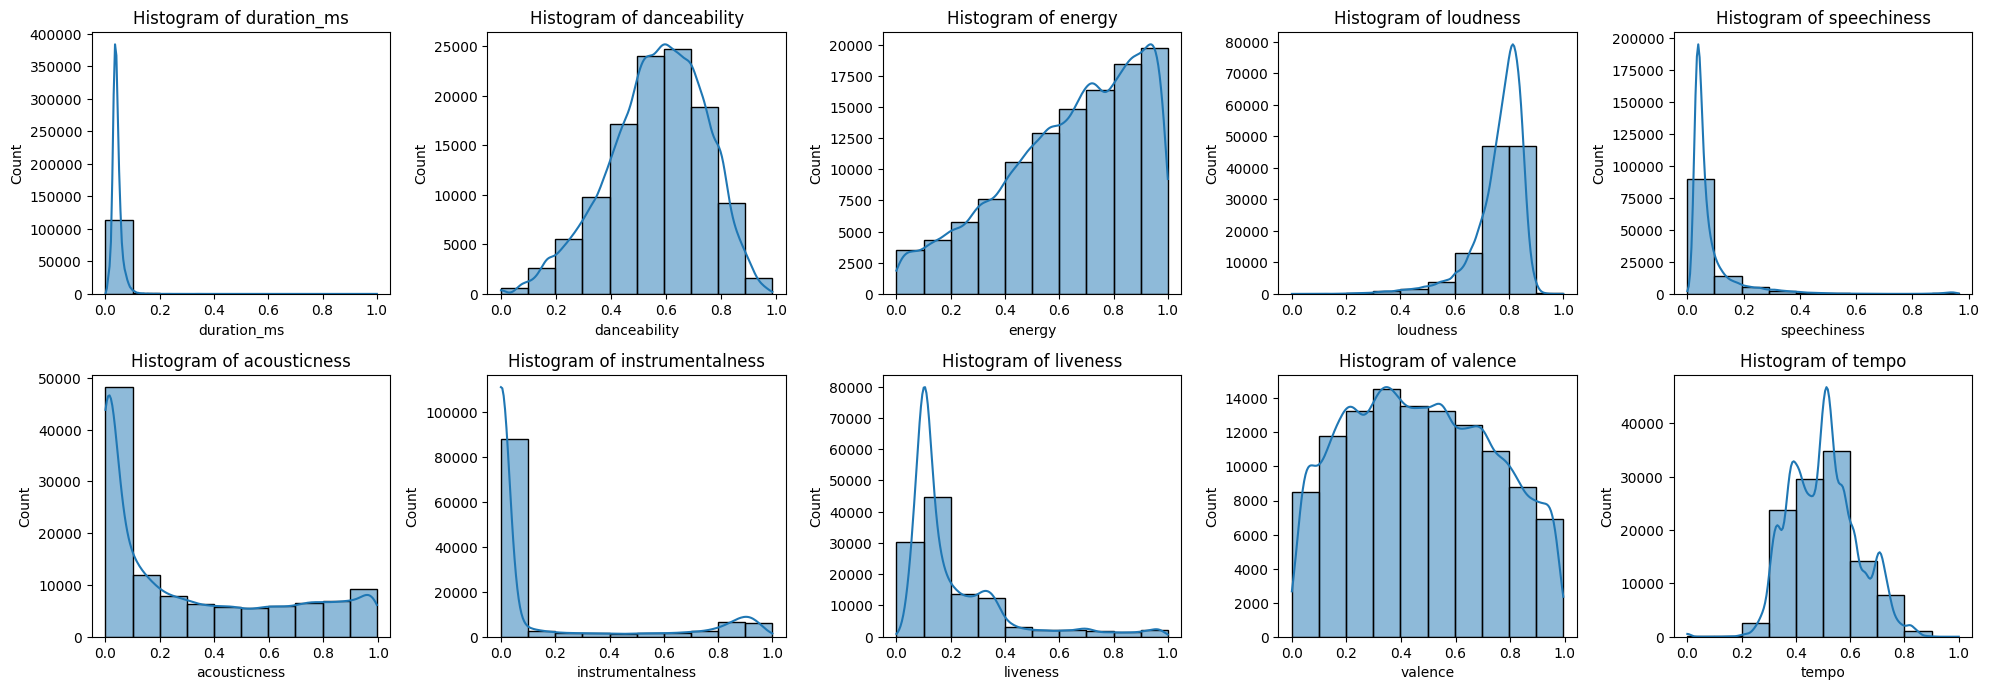

In [21]:
continuous_col = ['duration_ms', 'danceability','energy','loudness','speechiness','acousticness',
                       'instrumentalness','liveness','valence','tempo']

fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(20, 10))
axes = axes.flatten()

for i, col in enumerate(continuous_col):
    sns.histplot(spotify[col], bins=10, kde=True, edgecolor='black', ax=axes[i])
    axes[i].set_title(f'Histogram of {col}')
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

In [22]:
# Using VIF to decide whether we need to drop correlated columns
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_df = pd.DataFrame()
vif_df["Feature"] = continuous_col
vif_data = spotify[continuous_col]
vif_df["VIF"] = [variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])]
vif_df

,Feature,VIF
0,duration_ms,5.278696
1,danceability,17.184244
2,energy,29.593328
3,loudness,74.061521
4,speechiness,1.842079
5,acousticness,3.922563
6,instrumentalness,1.432461
7,liveness,2.540123
8,valence,6.808165
9,tempo,17.951137


absurd VIF!! let's just not use regression model or clustering model lol

In [23]:
spotify[continuous_col].describe()

,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000
mean,0.041969,0.566801,0.641383,0.763407,0.084652,0.314907,0.156051,0.213554,0.474066,0.501897
std,0.020521,0.173543,0.251530,0.093028,0.105733,0.332522,0.309556,0.190378,0.259261,0.123179
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.031648,0.456000,0.472000,0.730962,0.035900,0.016900,0.000000,0.098000,0.260000,0.407682
50%,0.039077,0.580000,0.685000,0.786619,0.048900,0.169000,0.000042,0.132000,0.464000,0.501360
75%,0.048371,0.695000,0.854000,0.823632,0.084500,0.597500,0.049000,0.273000,0.683000,0.575543
max,1.000000,0.985000,1.000000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,1.000000


In [24]:
# since variables are skewed, let's try auto-transformation
from sklearn.preprocessing import PowerTransformer

feature_transformer = PowerTransformer(method="yeo-johnson").set_output(transform='pandas')
target_transformer = PowerTransformer(method="yeo-johnson").set_output(transform='pandas')

spotify[continuous_col] = feature_transformer.fit_transform(spotify[continuous_col])
spotify['popularity'] = target_transformer.fit_transform(spotify[['popularity']])


spotify

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,1.727981,0.217042,False,0.599380,-0.827804,1,0.143116,0,1.483006,-0.933744,-0.593842,1.261167,0.935621,-1.158830,4,acoustic
1,0.975759,-0.994192,False,-0.886325,-1.675387,1,-1.717659,1,0.507178,1.492172,-0.593753,-0.701486,-0.779562,-1.547171,4,acoustic
2,1.060686,-0.044824,False,-0.792279,-1.158407,0,-0.621018,1,-0.059980,-0.018783,-0.593862,-0.475311,-1.414828,-1.590995,4,acoustic
3,1.645697,-0.168963,False,-1.628365,-1.904202,0,-1.826600,1,-0.793222,1.471943,-0.592475,-0.282743,-1.312492,1.890019,3,acoustic
4,2.094520,-0.212977,False,0.234509,-0.889175,2,-0.609510,1,-0.162439,0.778256,-0.593862,-0.986411,-1.206921,-0.034733,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,-0.528085,1.692415,False,-2.027355,-1.506193,5,-1.636358,1,-0.545643,1.114778,1.946853,-0.930357,-1.808687,0.166814,5,world-music
113996,-0.482042,1.692422,False,-2.019283,-1.785477,0,-1.810907,0,-0.631080,1.561897,1.949709,-0.642801,-1.803542,-1.257438,4,world-music
113997,-0.482042,0.695936,False,0.302419,-1.247865,0,-0.856955,0,-0.553656,1.429668,-0.593862,-0.969798,1.034015,0.376220,4,world-music
113998,0.370960,0.827368,False,0.046357,-0.668552,7,-0.855812,1,-1.099649,0.555848,-0.593862,0.873694,-0.188064,0.492257,4,world-music


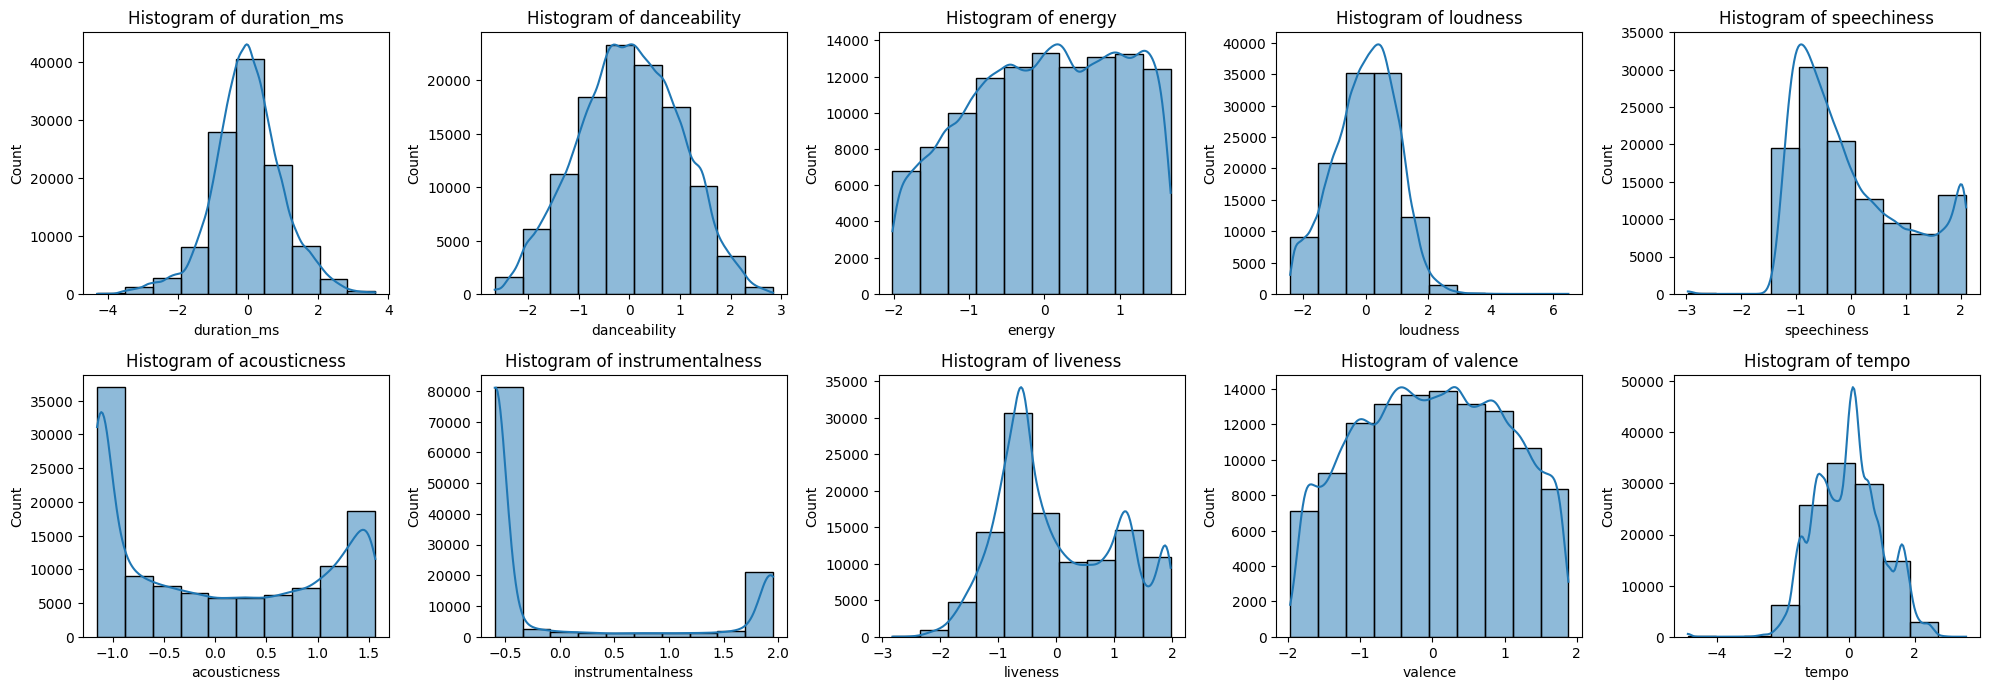

In [25]:
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(20, 10))
axes = axes.flatten()

for i, col in enumerate(continuous_col):
    sns.histplot(spotify[col], bins=10, kde=True, edgecolor='black', ax=axes[i])
    axes[i].set_title(f'Histogram of {col}')
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

Too many outliers and 0's, so we are defnitely not using regression model or clustering technique. Tree based or Neural Netowrk only

In [26]:
## categorical encoding

# key
key_map = {0:'C', 1:'Db', 2:'D', 3:'Eb', 4:'E', 5:'F', 6:'Gb',7:'G', 8:'Ab', 9:'A', 10:'Bb', 11:'B'}
spotify['key'] = spotify['key'].map(key_map)

# mode
mode_map = {0:'Minor', 1:'Major'}
spotify['mode'] = spotify['mode'].map(mode_map)

# drop time_signature
spotify = spotify.drop('time_signature', axis=1)

spotify

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_genre
0,1.727981,0.217042,False,0.599380,-0.827804,Db,0.143116,Minor,1.483006,-0.933744,-0.593842,1.261167,0.935621,-1.158830,acoustic
1,0.975759,-0.994192,False,-0.886325,-1.675387,Db,-1.717659,Major,0.507178,1.492172,-0.593753,-0.701486,-0.779562,-1.547171,acoustic
2,1.060686,-0.044824,False,-0.792279,-1.158407,C,-0.621018,Major,-0.059980,-0.018783,-0.593862,-0.475311,-1.414828,-1.590995,acoustic
3,1.645697,-0.168963,False,-1.628365,-1.904202,C,-1.826600,Major,-0.793222,1.471943,-0.592475,-0.282743,-1.312492,1.890019,acoustic
4,2.094520,-0.212977,False,0.234509,-0.889175,D,-0.609510,Major,-0.162439,0.778256,-0.593862,-0.986411,-1.206921,-0.034733,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,-0.528085,1.692415,False,-2.027355,-1.506193,F,-1.636358,Major,-0.545643,1.114778,1.946853,-0.930357,-1.808687,0.166814,world-music
113996,-0.482042,1.692422,False,-2.019283,-1.785477,C,-1.810907,Minor,-0.631080,1.561897,1.949709,-0.642801,-1.803542,-1.257438,world-music
113997,-0.482042,0.695936,False,0.302419,-1.247865,C,-0.856955,Minor,-0.553656,1.429668,-0.593862,-0.969798,1.034015,0.376220,world-music
113998,0.370960,0.827368,False,0.046357,-0.668552,G,-0.855812,Major,-1.099649,0.555848,-0.593862,0.873694,-0.188064,0.492257,world-music


### time signature is all over the places and the data is pretty trash so we drop it

In [27]:
spotify['track_genre'].unique()

array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
       'breakbeat', 'british', 'cantopop', 'chicago-house', 'children',
       'chill', 'classical', 'club', 'comedy', 'country', 'dance',
       'dancehall', 'death-metal', 'deep-house', 'detroit-techno',
       'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm',
       'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk',
       'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove',
       'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle',
       'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian',
       'indie-pop', 'indie', 'industrial', 'iranian', 'j-dance', 'j-idol',
       'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino',
       'malay', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb',
       'new-age', 'opera', 'pagode', 'party', 'piano', 'pop-film', 'pop',
       'pow

In [28]:
# using chatgpt we can make logical binning for genre types
# this could use some optimization during modeling phase

# type 1: Electronic & Dance
# type 2: Rock, Alternative, & Metal
# type 3: Pop, Urban, & Mainstream Vibes
# type 4: Classical, Instrumental, & Chill
# type 5: World, Traditional, Folk, & Niche/Media


genre_map = {
    1: [
        "breakbeat", "chicago-house", "club", "dance", "deep-house", "detroit-techno",
        "disco", "drum-and-bass", "dub", "dubstep", "edm", "electro", "electronic",
        "hardstyle", "house", "idm", "j-dance", "minimal-techno", "progressive-house",
        "techno", "trance", "trip-hop", "party", "garage"
    ],
    2: [
        "alt-rock", "alternative", "black-metal", "death-metal", "emo", "grunge",
        "hard-rock", "hardcore", "heavy-metal", "indie", "j-rock", "industrial",
        "psych-rock", "punk-rock", "punk", "rock-n-roll", "rock", "rockabilly",
        "metal", "metalcore", "grindcore", "goth", "guitar"
    ],
    3: [
        "pop", "pop-film", "power-pop", "indie-pop", "hip-hop", "r-n-b", "dancehall",
        "funk", "groove", "soul", "synth-pop", "j-pop", "k-pop", "cantopop", "mandopop",
        "j-idol", "british", "happy", "romance", "sad", "show-tunes", "songwriter",
        "gospel", "reggaeton", "reggae", "ska", "swedish"
    ],
    4: [
        "acoustic", "ambient", "chill", "classical", "new-age", "opera", "piano",
        "study", "sleep", "jazz", "blues"
    ],
    5: [
        "afrobeat", "bluegrass", "brazil", "country", "folk", "forro", "french",
        "german", "honky-tonk", "indian", "iranian", "latin", "latino", "malay",
        "mpb", "pagode", "salsa", "samba", "sertanejo", "spanish", "tango",
        "turkish", "world-music", "anime", "children", "comedy", "disney", "kids"
    ]
}


genre_to_bin = {genre: bin_name 
                for bin_name, genres in genre_map.items() 
                for genre in genres}

spotify["track_genre"] = spotify["track_genre"].map(genre_to_bin)


spotify

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_genre
0,1.727981,0.217042,False,0.599380,-0.827804,Db,0.143116,Minor,1.483006,-0.933744,-0.593842,1.261167,0.935621,-1.158830,4.0
1,0.975759,-0.994192,False,-0.886325,-1.675387,Db,-1.717659,Major,0.507178,1.492172,-0.593753,-0.701486,-0.779562,-1.547171,4.0
2,1.060686,-0.044824,False,-0.792279,-1.158407,C,-0.621018,Major,-0.059980,-0.018783,-0.593862,-0.475311,-1.414828,-1.590995,4.0
3,1.645697,-0.168963,False,-1.628365,-1.904202,C,-1.826600,Major,-0.793222,1.471943,-0.592475,-0.282743,-1.312492,1.890019,4.0
4,2.094520,-0.212977,False,0.234509,-0.889175,D,-0.609510,Major,-0.162439,0.778256,-0.593862,-0.986411,-1.206921,-0.034733,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,-0.528085,1.692415,False,-2.027355,-1.506193,F,-1.636358,Major,-0.545643,1.114778,1.946853,-0.930357,-1.808687,0.166814,5.0
113996,-0.482042,1.692422,False,-2.019283,-1.785477,C,-1.810907,Minor,-0.631080,1.561897,1.949709,-0.642801,-1.803542,-1.257438,5.0
113997,-0.482042,0.695936,False,0.302419,-1.247865,C,-0.856955,Minor,-0.553656,1.429668,-0.593862,-0.969798,1.034015,0.376220,5.0
113998,0.370960,0.827368,False,0.046357,-0.668552,G,-0.855812,Major,-1.099649,0.555848,-0.593862,0.873694,-0.188064,0.492257,5.0


In [29]:
# dummy encoding
# skippable if using tree based algorithms
cat_col = ['explicit', 'key', 'mode', 'track_genre']

spotify = pd.get_dummies(spotify, columns=cat_col, prefix=cat_col, drop_first=True)

spotify.head(10)

,popularity,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,...,key_E,key_Eb,key_F,key_G,key_Gb,mode_Minor,track_genre_2.0,track_genre_3.0,track_genre_4.0,track_genre_5.0
0,1.727981,0.217042,0.599380,-0.827804,0.143116,1.483006,-0.933744,-0.593842,1.261167,0.935621,...,0,0,0,0,0,1,0,0,1,0
1,0.975759,-0.994192,-0.886325,-1.675387,-1.717659,0.507178,1.492172,-0.593753,-0.701486,-0.779562,...,0,0,0,0,0,0,0,0,1,0
2,1.060686,-0.044824,-0.792279,-1.158407,-0.621018,-0.059980,-0.018783,-0.593862,-0.475311,-1.414828,...,0,0,0,0,0,0,0,0,1,0
3,1.645697,-0.168963,-1.628365,-1.904202,-1.826600,-0.793222,1.471943,-0.592475,-0.282743,-1.312492,...,0,0,0,0,0,0,0,0,1,0
4,2.094520,-0.212977,0.234509,-0.889175,-0.609510,-0.162439,0.778256,-0.593862,-0.986411,-1.206921,...,0,0,0,0,0,0,0,0,1,0
5,1.103018,0.001696,0.676973,-0.758059,-0.409800,1.048117,0.274377,-0.593862,0.308396,0.761255,...,0,0,0,0,1,0,0,0,1,0
6,1.769008,0.200932,-0.953284,-1.719048,-0.413391,-0.828643,1.418121,-0.593805,-0.850103,-1.611624,...,0,0,0,0,0,0,0,0,1,0
7,2.013584,0.369253,0.774985,-0.885800,-0.531815,-0.565724,0.968792,-0.593862,-0.757102,0.925026,...,0,0,0,0,0,0,0,0,1,0
8,1.769008,-0.348256,0.277655,-0.985294,-0.384018,-0.766955,0.291191,-0.593862,-0.062877,0.772012,...,0,0,0,0,0,0,0,0,1,0
9,1.018267,-0.117334,-0.771170,-0.177002,0.135949,-1.109457,0.674587,-0.513124,-1.147901,-1.080956,...,0,0,0,0,0,0,0,0,1,0
